# NN Training Results

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
def visualize(df, row, col, response):
    
    print(f'ANOVA for {response}')
    model = ols(f'{response} ~ C(embed_hidden_dim) + C(embed_dim1) + C(embed_dim2) + C(relu_hidden_dim)', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)

    pivot_table = df.pivot_table(values=response, index=col, columns=row)
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': response})
    plt.title(f'Heatmap of {response}',size=18)
    plt.xlabel(row)
    plt.ylabel(col)
    plt.show()
    
responses = ['tr_mae', 'val_mae']

## CFLP_10_10

ANOVA for tr_mae
                           sum_sq    df           F        PR(>F)
C(embed_hidden_dim)   5261.498349   2.0   28.794851  6.963884e-10
C(embed_dim1)          853.597727   2.0    4.671525  1.241670e-02
C(embed_dim2)        34845.873918   2.0  190.702666  2.808261e-29
C(relu_hidden_dim)   26324.821316   2.0  144.069098  1.018321e-25
Residual              6486.687094  71.0         NaN           NaN


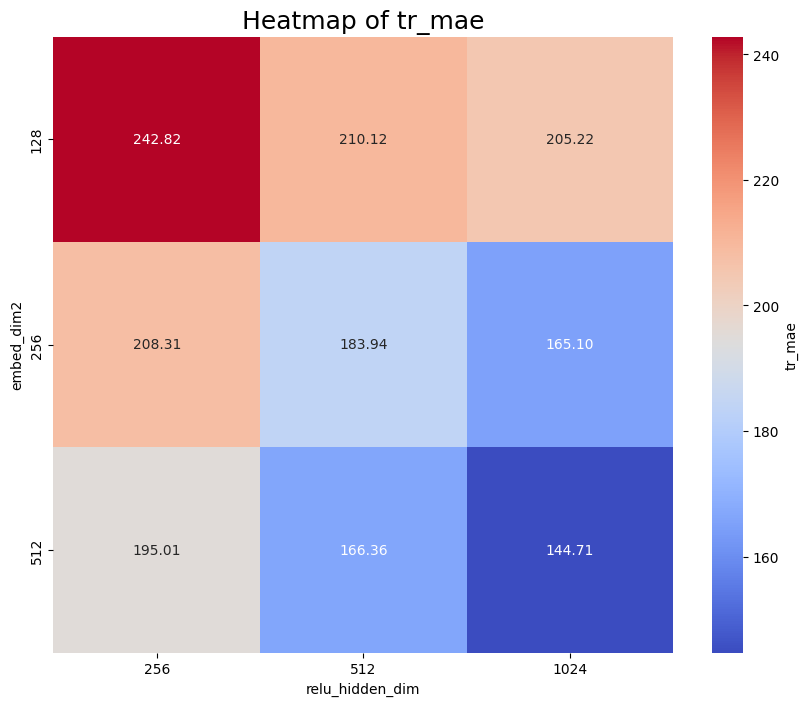

ANOVA for val_mae
                            sum_sq    df          F        PR(>F)
C(embed_hidden_dim)   41651.000279   2.0  20.171694  1.156336e-07
C(embed_dim1)         87612.429220   2.0  42.430941  7.540575e-13
C(embed_dim2)           759.207974   2.0   0.367687  6.936447e-01
C(relu_hidden_dim)   139453.148221   2.0  67.537543  3.730495e-17
Residual              73301.255978  71.0        NaN           NaN


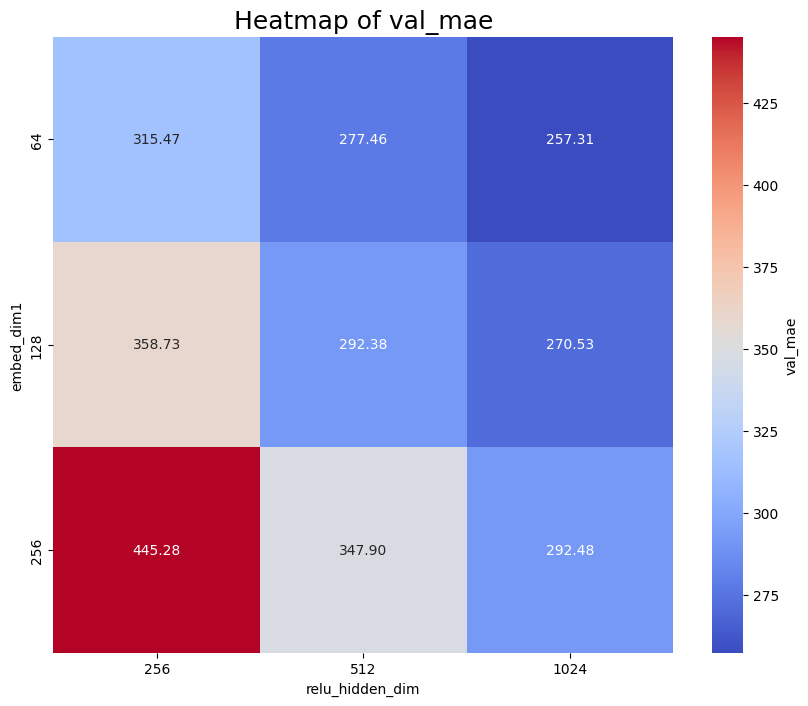

In [3]:
df = pd.read_csv("cflp_results.csv", index_col=0)
row = "relu_hidden_dim"
col = "embed_dim2"
visualize(df, row, col, "tr_mae")

col = "embed_dim1"
visualize(df, row, col, "val_mae")

## PP

ANOVA for tr_mae
                        sum_sq    df          F        PR(>F)
C(embed_hidden_dim)   1.843340   2.0   2.339299  1.036812e-01
C(embed_dim1)         0.758332   2.0   0.962364  3.868472e-01
C(embed_dim2)         2.676702   2.0   3.396880  3.892820e-02
C(relu_hidden_dim)   43.038987   2.0  54.618810  3.690025e-15
Residual             28.367581  72.0        NaN           NaN


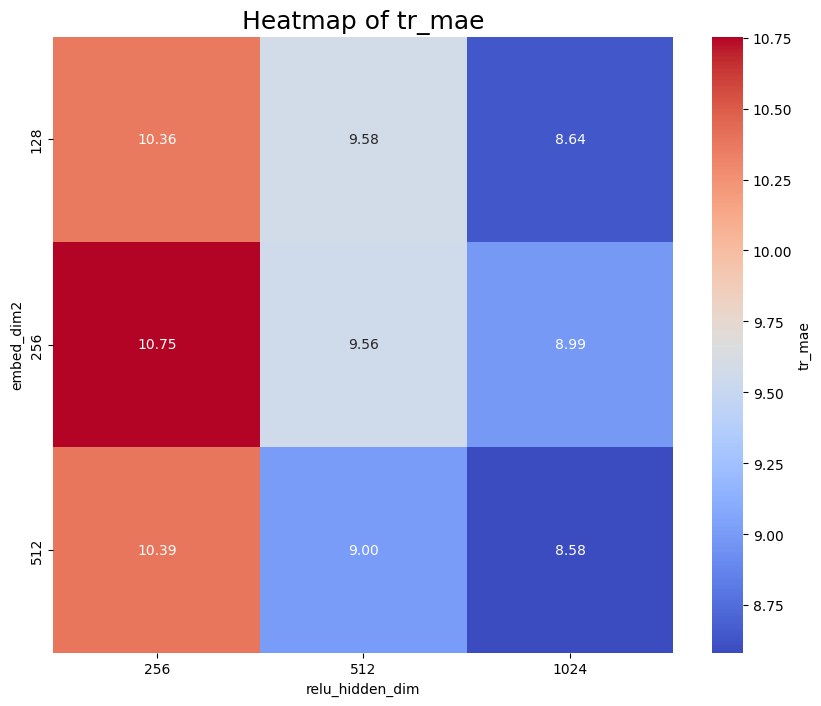

ANOVA for val_mae
                        sum_sq    df          F        PR(>F)
C(embed_hidden_dim)   1.224390   2.0   1.340460  2.681773e-01
C(embed_dim1)         0.564007   2.0   0.617474  5.421361e-01
C(embed_dim2)         1.891385   2.0   2.070685  1.335442e-01
C(relu_hidden_dim)   65.047539   2.0  71.213939  8.666524e-18
Residual             32.882768  72.0        NaN           NaN


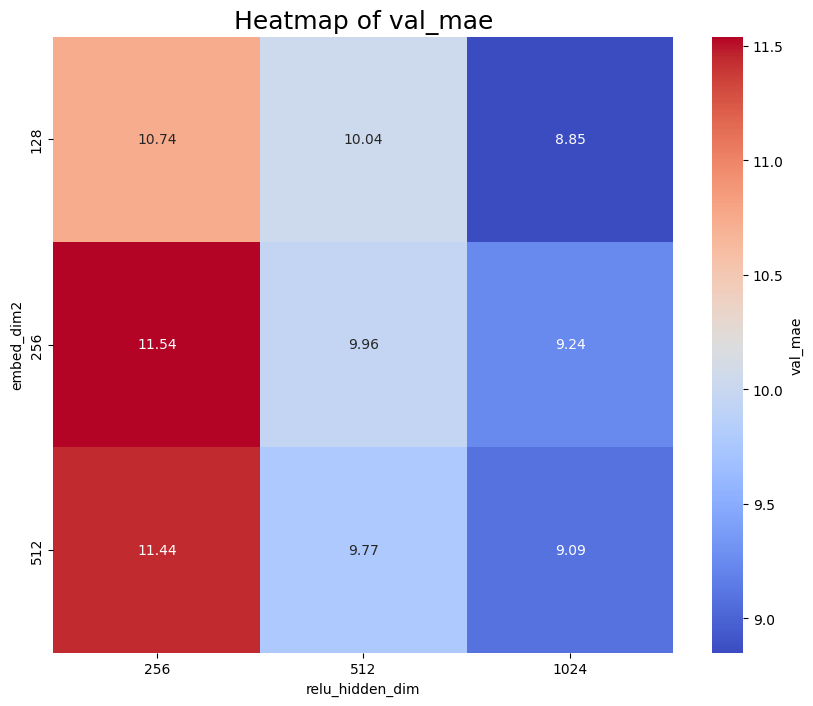

In [4]:
df = pd.read_csv("pp_results.csv", index_col=0)
row = 'relu_hidden_dim'
col = 'embed_dim2'
visualize(df, row, col, "tr_mae")
visualize(df, row, col, "val_mae")

## Training curve
![](cflp_e_curve.png)
![](cflp_p_curve.png)
![](pp_e_curve.png)
![](pp_p_curve.png)